In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##fire intensity (density of fire regions)

In [42]:

def get_fire_intensity_ratios(date_str,fire_intensity_ratios = []):

  for i in range(16):
    # filename = f'fire_mask_tile_{i}.png'

    file_path=f'/content/gdrive/My Drive/firemasks_2022_dates/' + date_str
    if not os.path.exists(file_path):
      return -1
    file_path = file_path + f'/tile_{i}.tif'
    #print(file_path)
    image = cv2.imread(file_path)


    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    lower_green = np.array([40, 50, 50])
    upper_green = np.array([80, 255, 255])

    red_mask = cv2.inRange(hsv_image, lower_red, upper_red)
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    red_area = cv2.countNonZero(red_mask)
    green_area = cv2.countNonZero(green_mask)

    fire_intensity_ratio = red_area / green_area
    fire_intensity_ratios.append(round(fire_intensity_ratio*100,2))
  return fire_intensity_ratios

#def get_fire_intensity_ratio_all():

fire_intensity_ratios = get_fire_intensity_ratios('2022_07_19',[])
print(fire_intensity_ratios)

[0.01, 0.0, 0.01, 0.04, 0.0, 0.0, 0.02, 0.02, 0.0, 0.02, 0.0, 0.05, 0.0, 0.0, 0.0, 0.04]


In [44]:
import json
import datetime
start_date = datetime.date(2022, 1, 1)
end_date = datetime.date(2022, 12, 31)
def get_date_strs(start_date, end_date):
  date_strs = []
  for single_date in range((end_date - start_date).days + 1):
    current_date = start_date + datetime.timedelta(days=single_date)
    date_strs.append(current_date.strftime("%Y_%m_%d"))
  return date_strs
date_strs = get_date_strs(datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))


def get_fire_intensity_ratio_all(date_strs,fire_intensity_ratios_all = {}):

  for date_str in date_strs:
    fire_intensity_ratios = get_fire_intensity_ratios(date_str,[])
    print(fire_intensity_ratios)
    if fire_intensity_ratios == -1:
      continue
    fire_intensity_ratios_all[date_str] = fire_intensity_ratios
    print(date_str)
  return fire_intensity_ratios_all

fire_intensity_ratios_all = get_fire_intensity_ratio_all(date_strs)
output_path = "/content/gdrive/My Drive/intensities.json"
with open(output_path, "w") as json_file:
    json.dump(fire_intensity_ratios_all, json_file)

[0.05, 0.15, 0.07, 0.06, 0.15, 0.08, 0.16, 0.02, 0.0, 0.1, 0.1, 0.49, 0.0, 0.0, 0.06, 0.2]
2022_01_01
[0.02, 0.08, 0.1, 0.0, 0.0, 0.06, 0.22, 0.17, 0.0, 0.06, 0.19, 0.62, 0.0, 0.03, 0.19, 0.23]
2022_01_02
[0.02, 0.08, 0.1, 0.0, 0.0, 0.06, 0.22, 0.17, 0.0, 0.06, 0.19, 0.62, 0.0, 0.03, 0.19, 0.23]
2022_01_03
[0.02, 0.08, 0.1, 0.0, 0.0, 0.06, 0.22, 0.17, 0.0, 0.06, 0.19, 0.62, 0.0, 0.03, 0.31, 0.23]
2022_01_04
[0.02, 0.08, 0.1, 0.0, 0.0, 0.06, 0.22, 0.17, 0.0, 0.06, 0.19, 0.62, 0.0, 0.03, 0.19, 0.23]
2022_01_05
[0.02, 0.08, 0.1, 0.0, 0.0, 0.06, 0.22, 0.15, 0.0, 0.06, 0.19, 0.62, 0.0, 0.03, 0.19, 0.23]
2022_01_06
[0.02, 0.08, 0.1, 0.0, 0.0, 0.06, 0.22, 0.17, 0.0, 0.06, 0.19, 0.62, 0.0, 0.03, 0.19, 0.23]
2022_01_07
[0.02, 0.08, 0.1, 0.0, 0.0, 0.06, 0.22, 0.17, 0.0, 0.06, 0.19, 0.62, 0.0, 0.03, 0.19, 0.23]
2022_01_08
[0.02, 0.08, 0.1, 0.0, 0.0, 0.06, 0.22, 0.17, 0.0, 0.06, 0.19, 0.62, 0.0, 0.03, 0.19, 0.23]
2022_01_09
[0.09, 0.09, 0.0, 0.03, 0.04, 0.06, 0.09, 0.06, 0.2, 0.05, 0.17, 0.81, 0.0

### time series of fire intensity over the year 2022 of 16 subareas

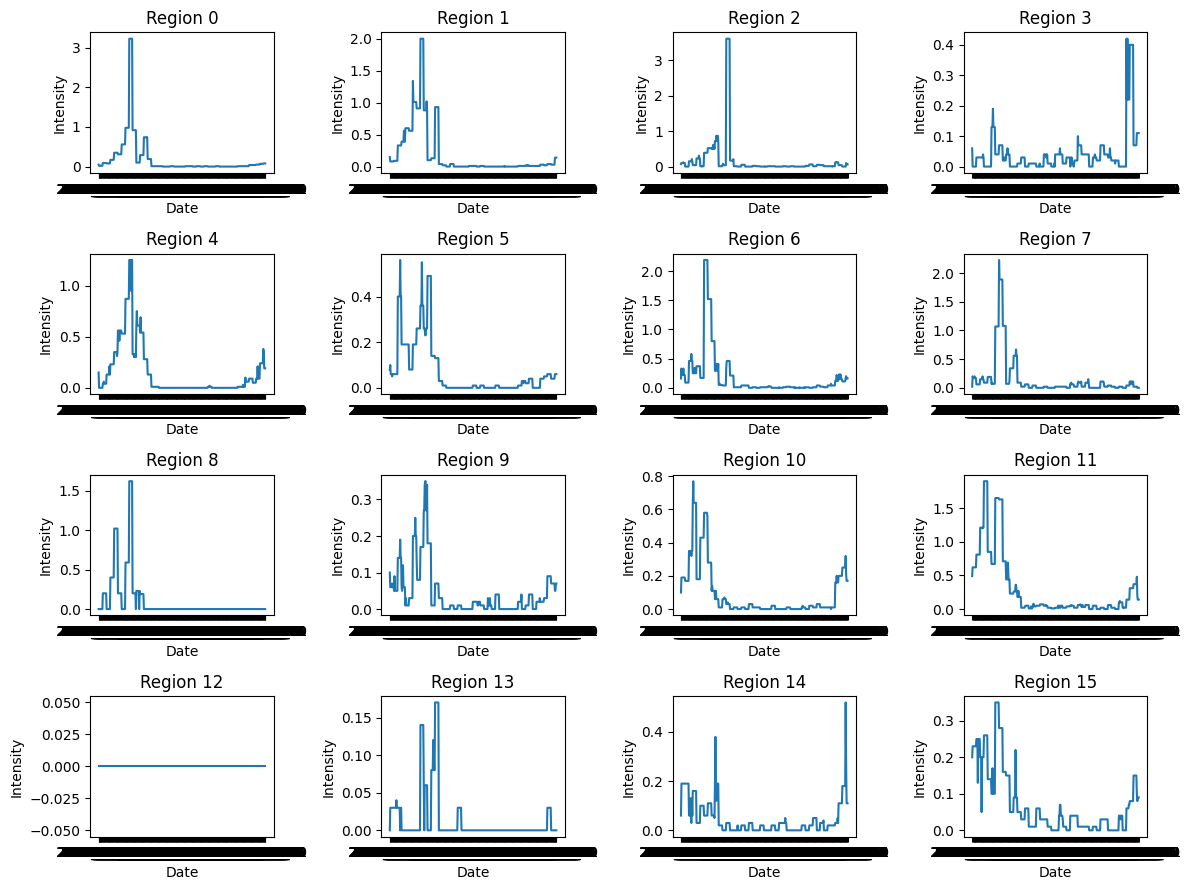

In [36]:
import json
import matplotlib.pyplot as plt
%matplotlib inline

with open(output_path, 'r') as f:
    data = json.load(f)

dates = list(data.keys())
intensities = list(data.values())

fig, axs = plt.subplots(4, 4, figsize=(12, 9))

for i in range(4):
    for j in range(4):

        index = i * 4 + j


        intensity_series = [day_intensity[index] for day_intensity in intensities]

        axs[i, j].plot(dates, intensity_series)
        axs[i, j].set_title(f'Region {index}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Intensity')


plt.tight_layout()
plt.show()


###heat map of fire intensity

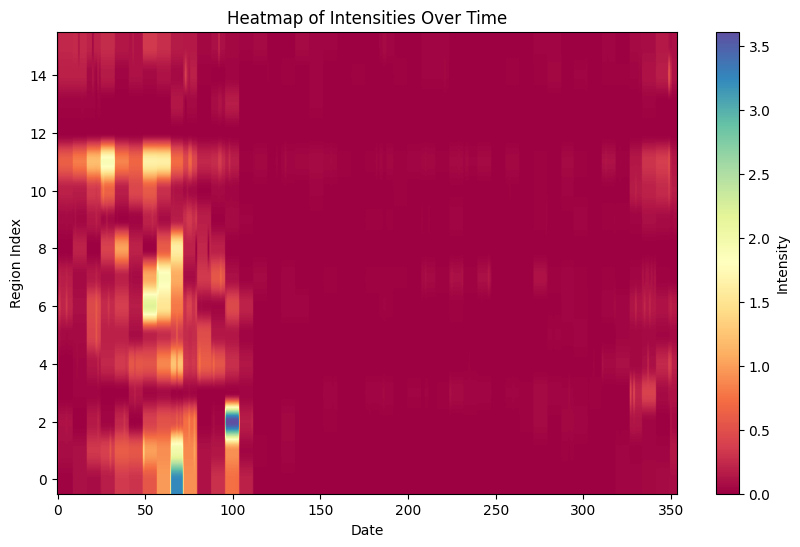

In [38]:
%matplotlib inline

intensities_array = np.array(intensities)

plt.figure(figsize=(10, 6))
plt.imshow(intensities_array.T, cmap='Spectral', aspect='auto', origin='lower')


plt.title('Heatmap of Intensities Over Time')
plt.xlabel('Date')
plt.ylabel('Region Index')

plt.colorbar(label='Intensity')


plt.show()












###Correlation of fire over year 2022 among the regions

Correlation Matrix:
          0         1         2         3         4         5         6   \
0   1.000000  0.915610  0.374034 -0.019670  0.809068  0.568034  0.516529   
1   0.915610  1.000000  0.510900 -0.014892  0.830374  0.654051  0.722141   
2   0.374034  0.510900  1.000000 -0.048171  0.262970  0.241463  0.295464   
3  -0.019670 -0.014892 -0.048171  1.000000  0.039800 -0.027131  0.059641   
4   0.809068  0.830374  0.262970  0.039800  1.000000  0.750458  0.636161   
5   0.568034  0.654051  0.241463 -0.027131  0.750458  1.000000  0.504674   
6   0.516529  0.722141  0.295464  0.059641  0.636161  0.504674  1.000000   
7   0.624730  0.673254  0.162380  0.022620  0.790735  0.548580  0.823810   
8   0.819573  0.750730  0.110164 -0.072407  0.751144  0.565243  0.362259   
9   0.535566  0.653725  0.283243  0.127372  0.581536  0.765255  0.580386   
10  0.206792  0.458318  0.036076  0.233612  0.446022  0.446709  0.625611   
11  0.380544  0.608852  0.122732  0.040391  0.580056  0.621762  0.75

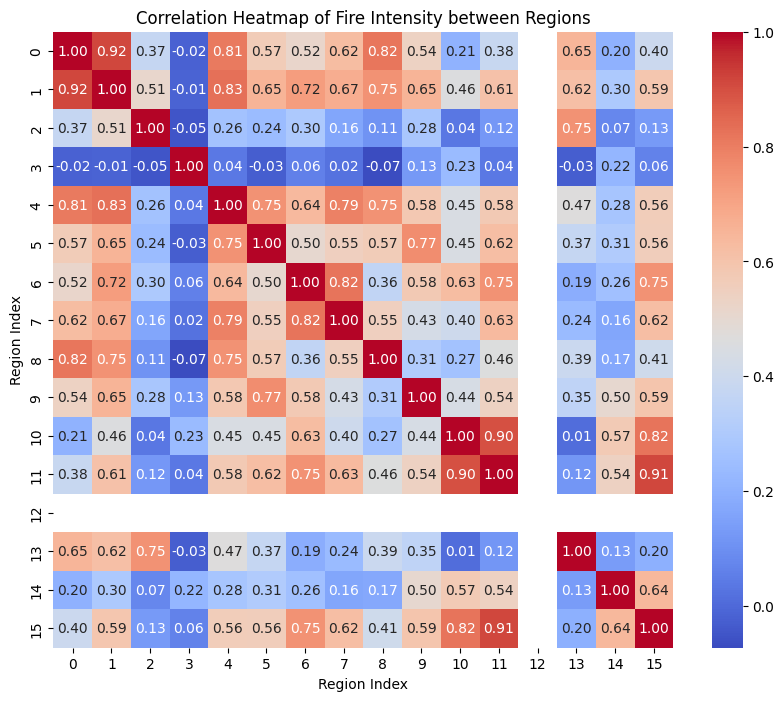

In [9]:

import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
output_path = "/content/gdrive/My Drive/intensities.json"
with open(output_path, 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)
correlation_matrix = df.T.corr()

print("Correlation Matrix:")
print(correlation_matrix)
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Fire Intensity between Regions')
plt.xlabel('Region Index')
plt.ylabel('Region Index')
plt.show()

###spatial time series

   2022_01_01  2022_01_02  2022_01_03  2022_01_04  2022_01_05  2022_01_06  \
0        0.05        0.02        0.02        0.02        0.02        0.02   
1        0.15        0.08        0.08        0.08        0.08        0.08   
2        0.07        0.10        0.10        0.10        0.10        0.12   
3        0.06        0.00        0.00        0.00        0.00        0.00   
4        0.15        0.00        0.00        0.00        0.00        0.00   

   2022_01_07  2022_01_08  2022_01_09  2022_01_10  ...  2022_12_22  \
0        0.02        0.02        0.02        0.09  ...        0.07   
1        0.08        0.08        0.08        0.09  ...        0.03   
2        0.10        0.10        0.10        0.00  ...        0.00   
3        0.00        0.00        0.00        0.03  ...        0.07   
4        0.00        0.00        0.00        0.04  ...        0.24   

   2022_12_23  2022_12_24  2022_12_25  2022_12_26  2022_12_27  2022_12_28  \
0        0.07        0.07        0.07  

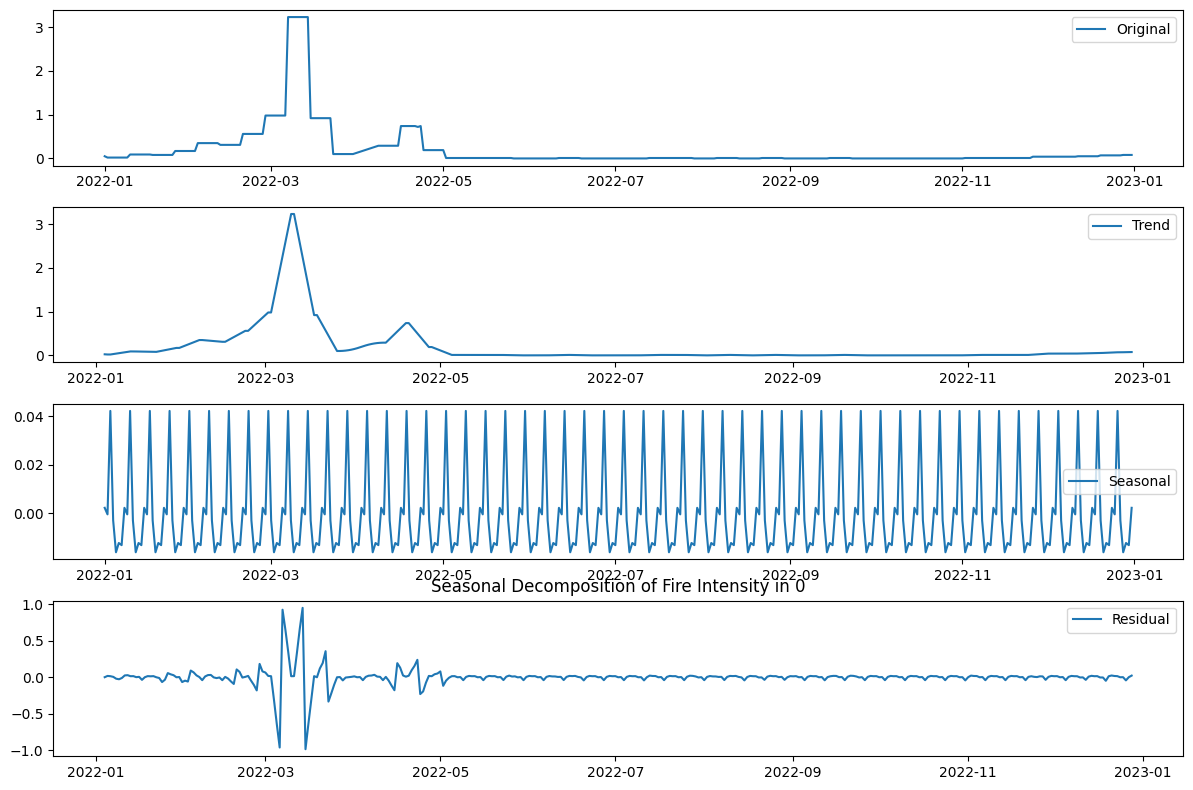

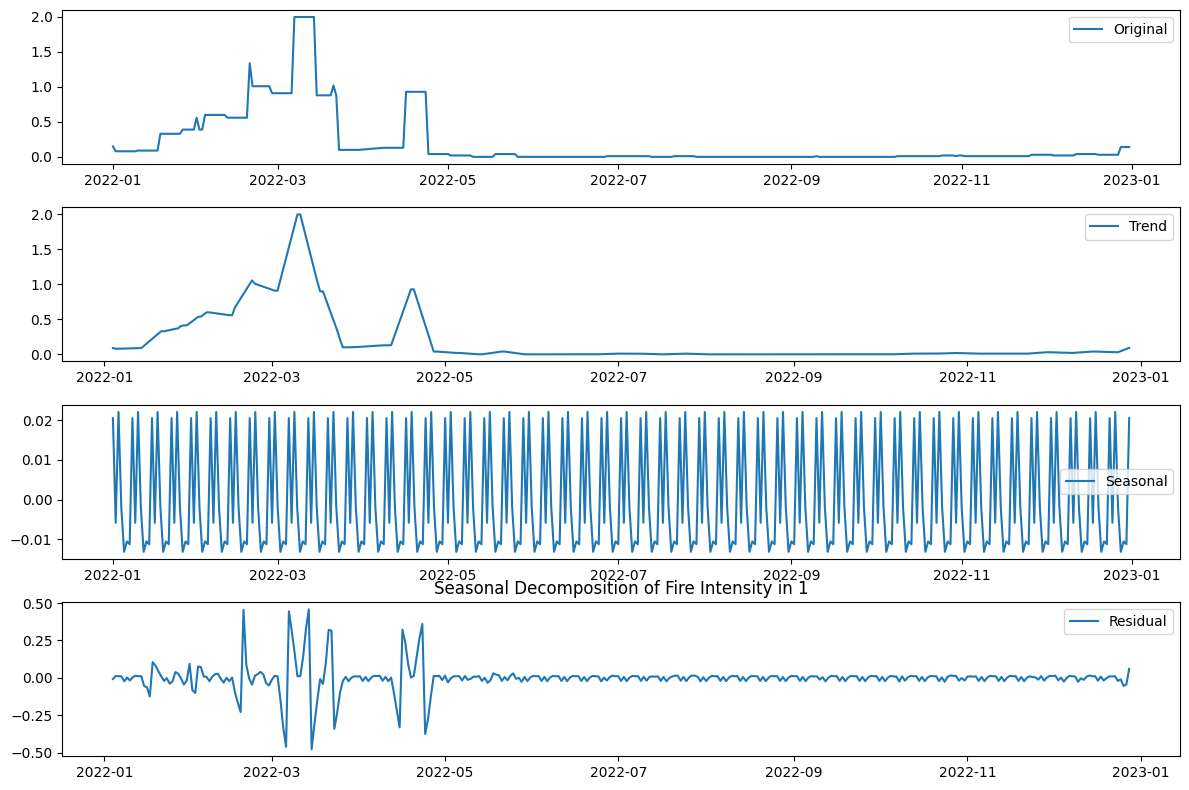

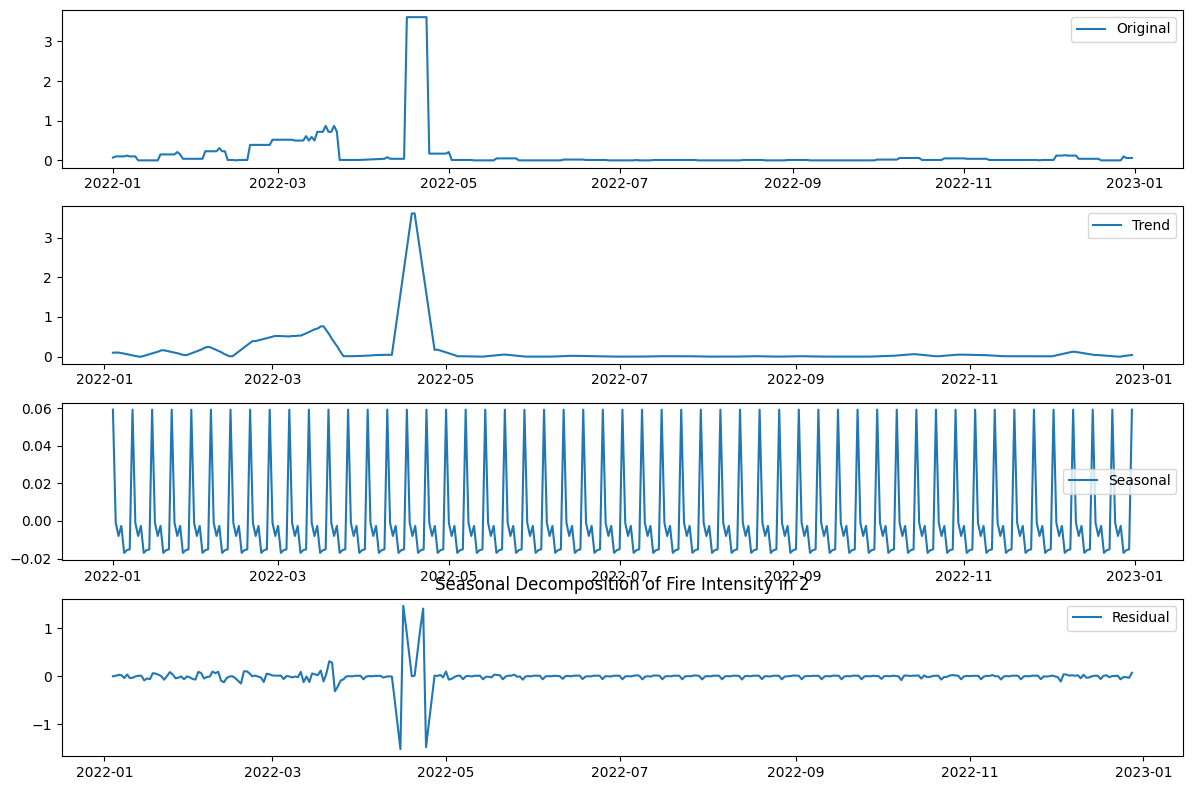

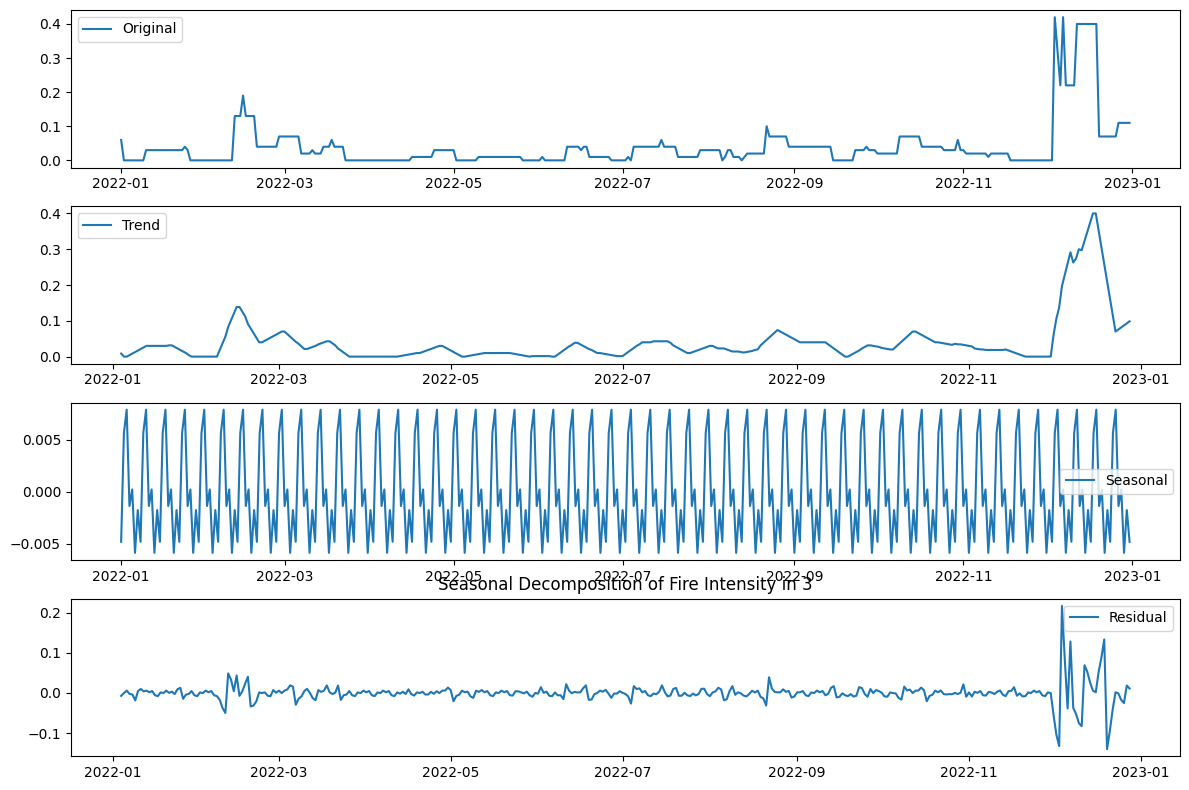

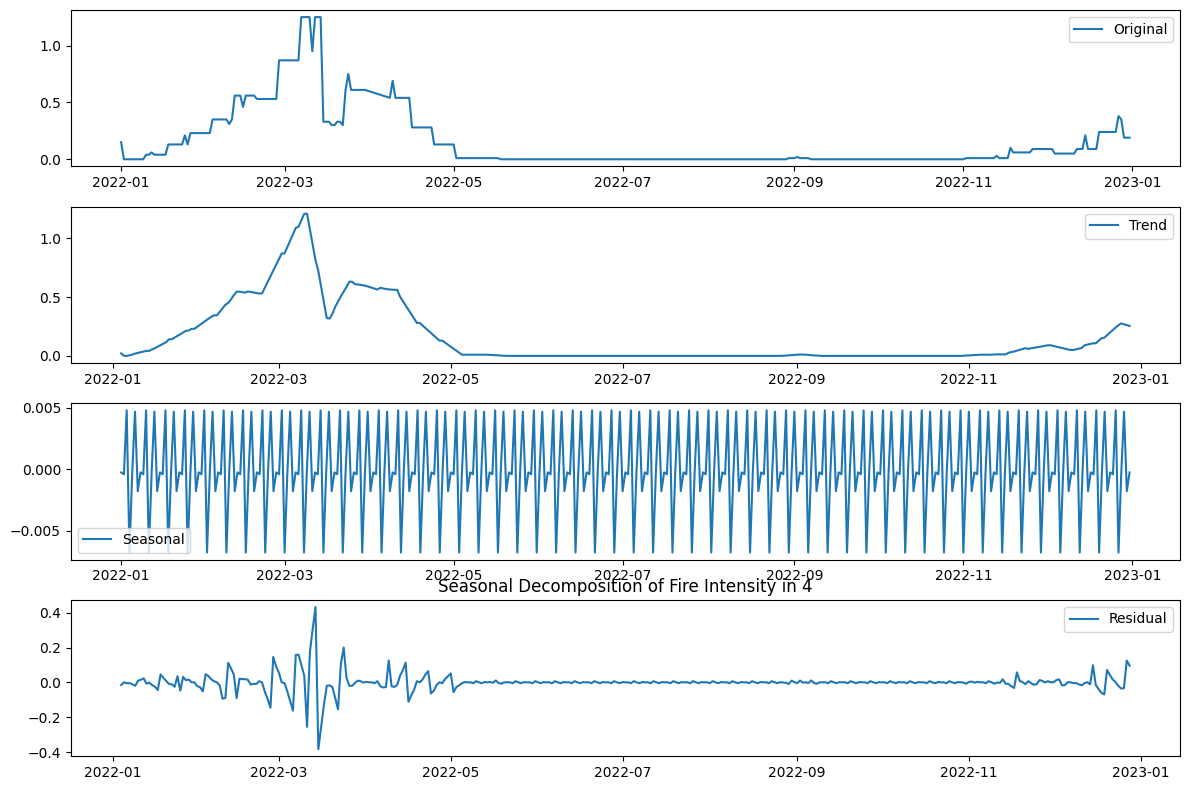

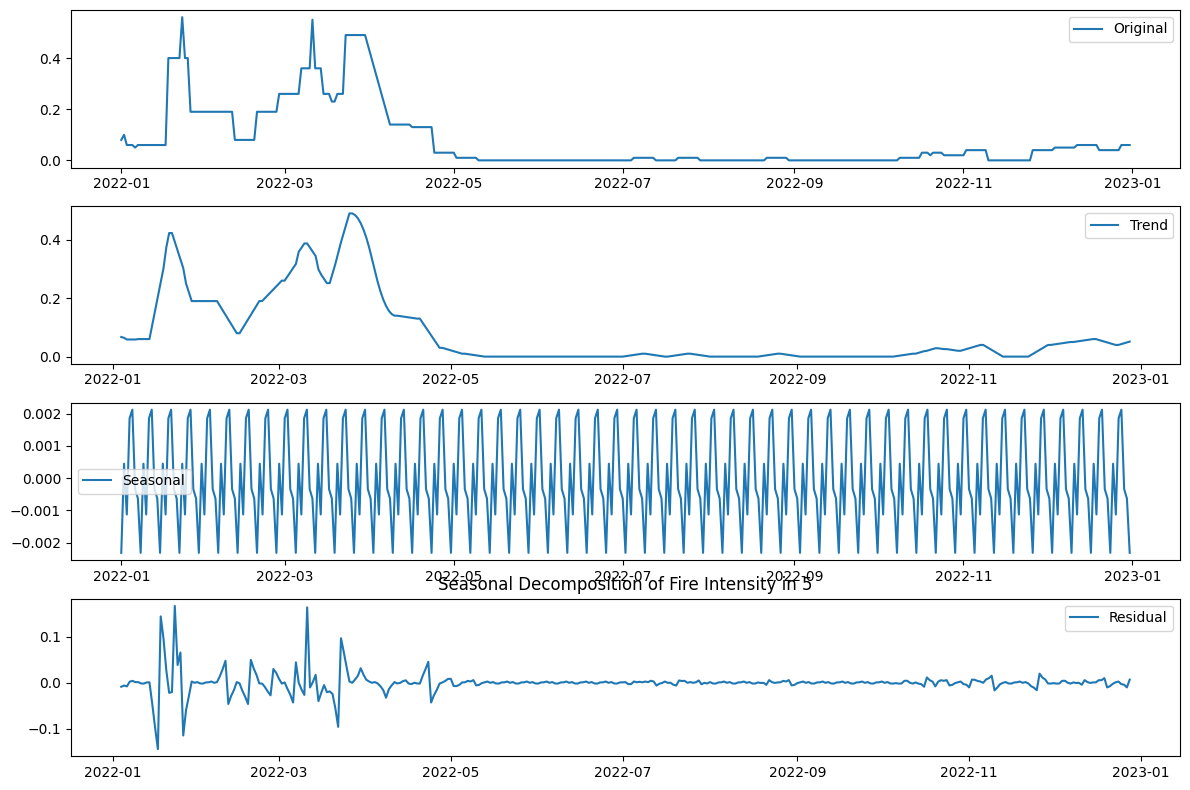

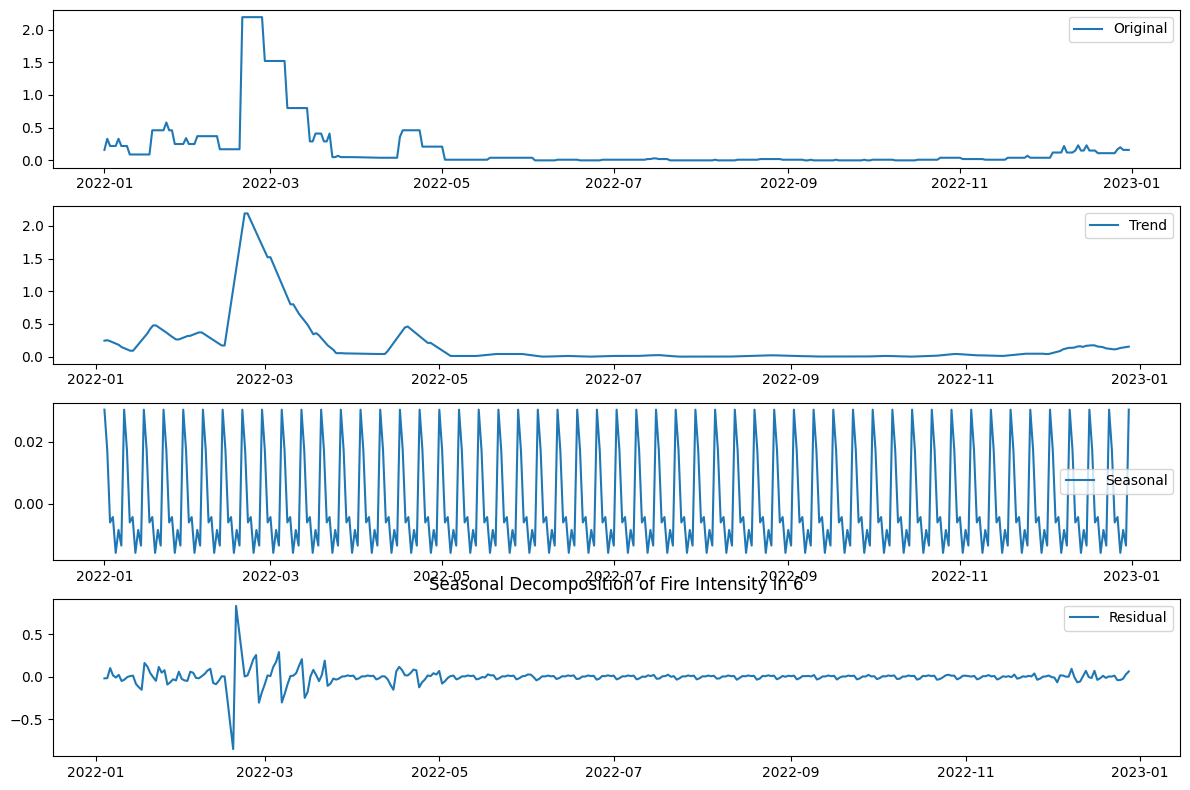

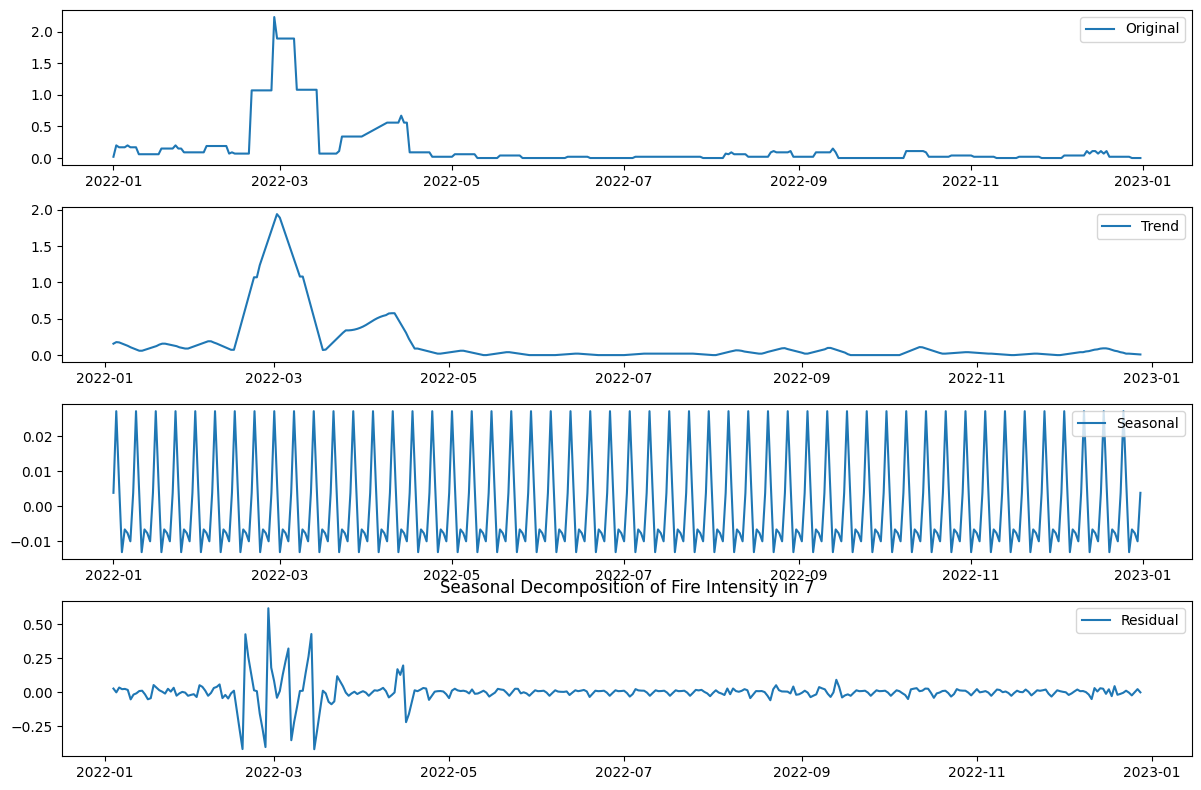

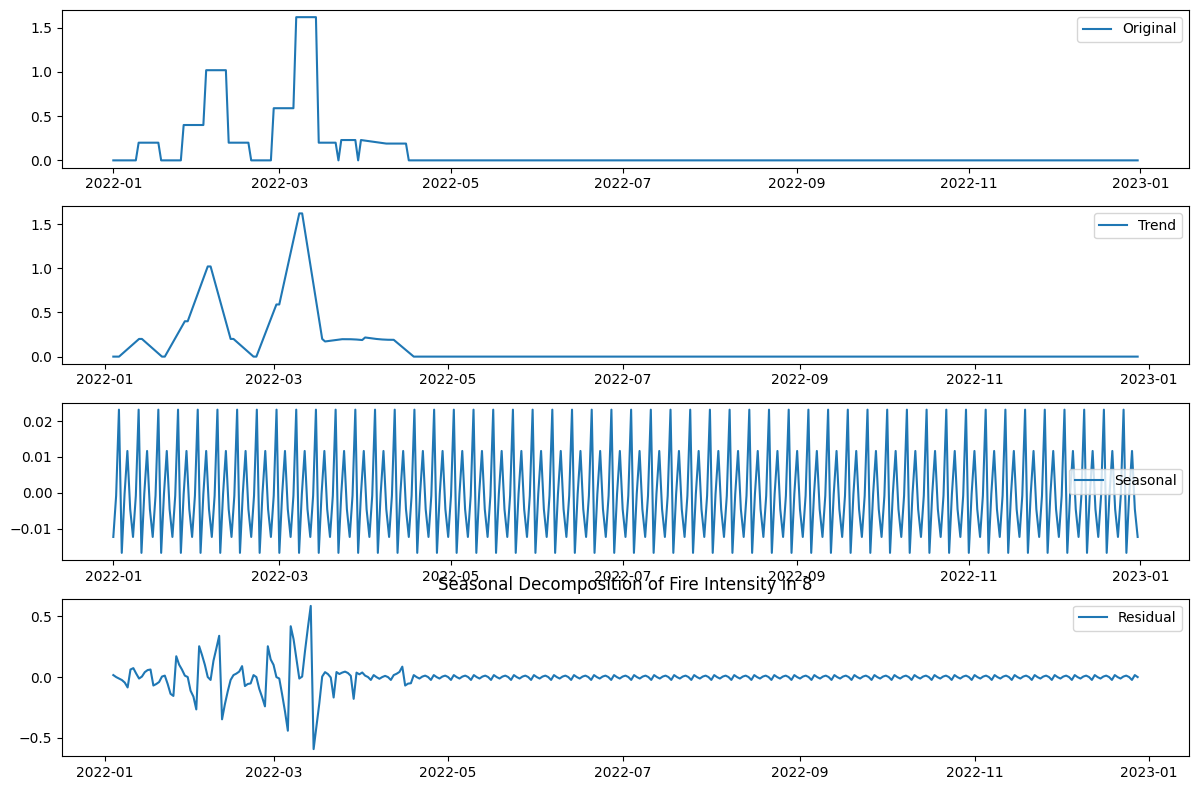

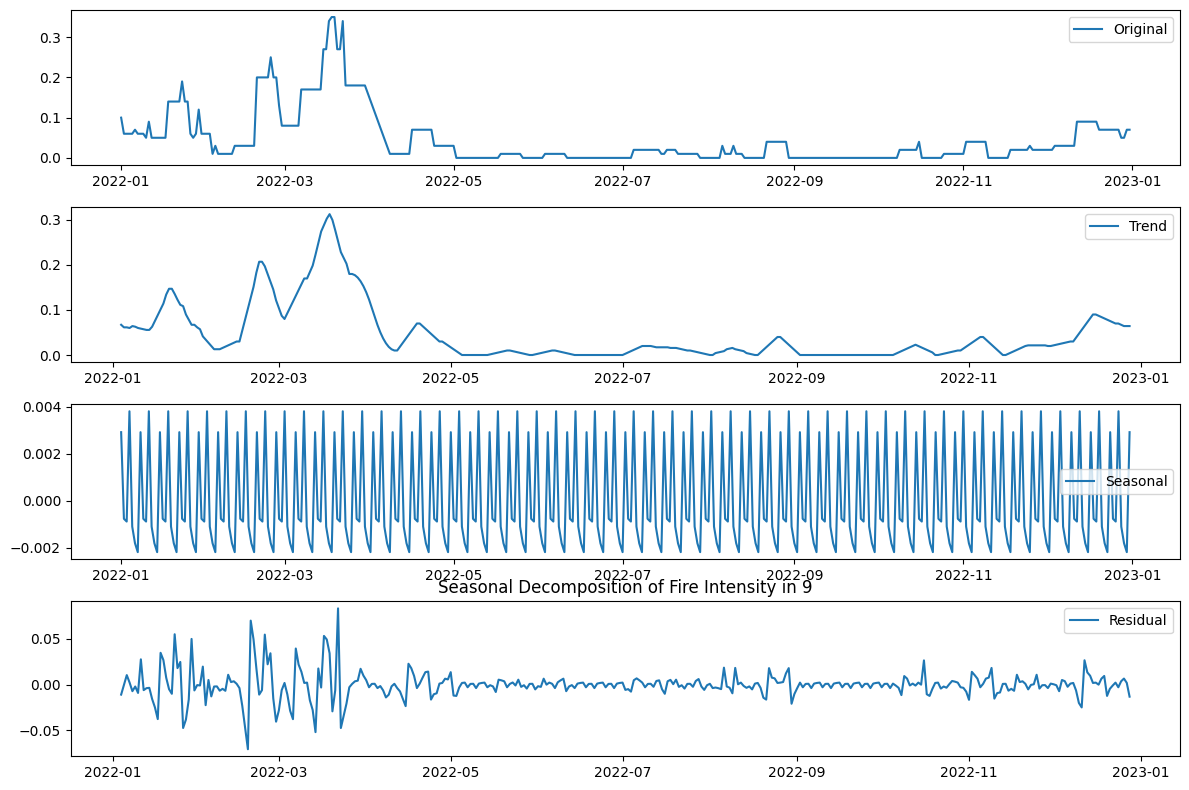

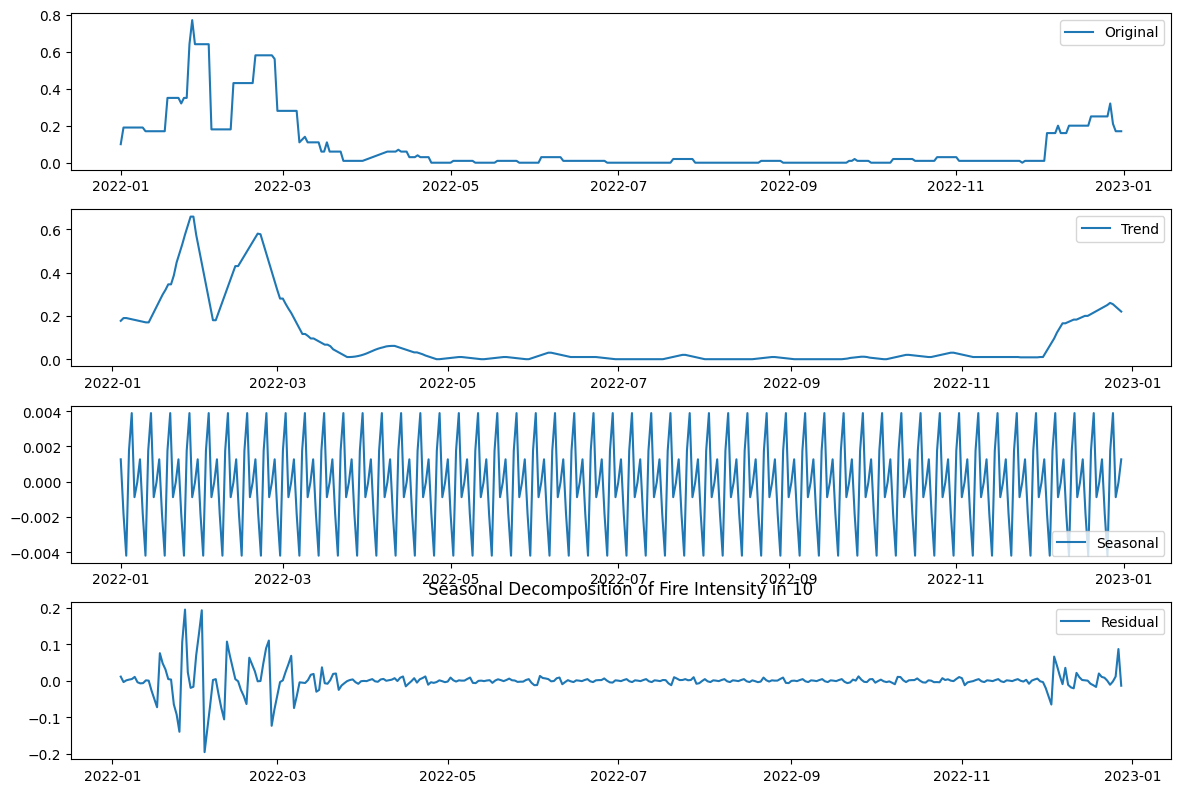

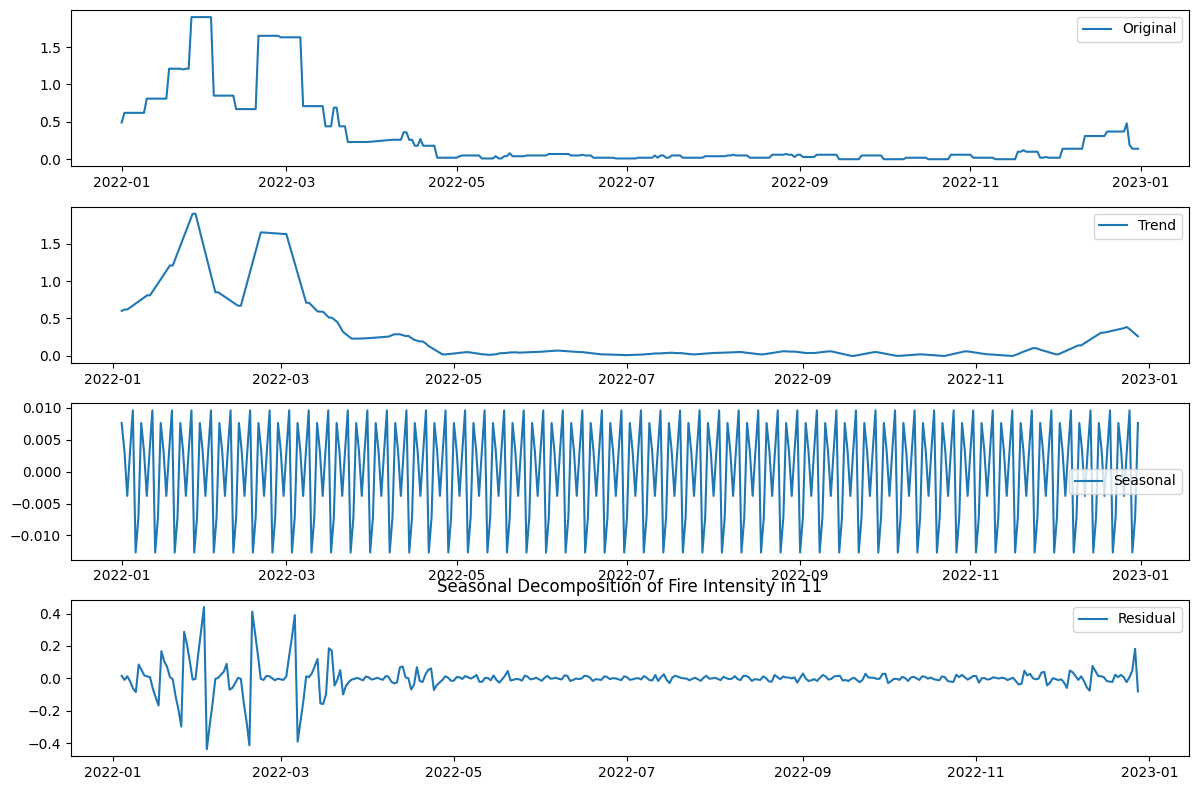

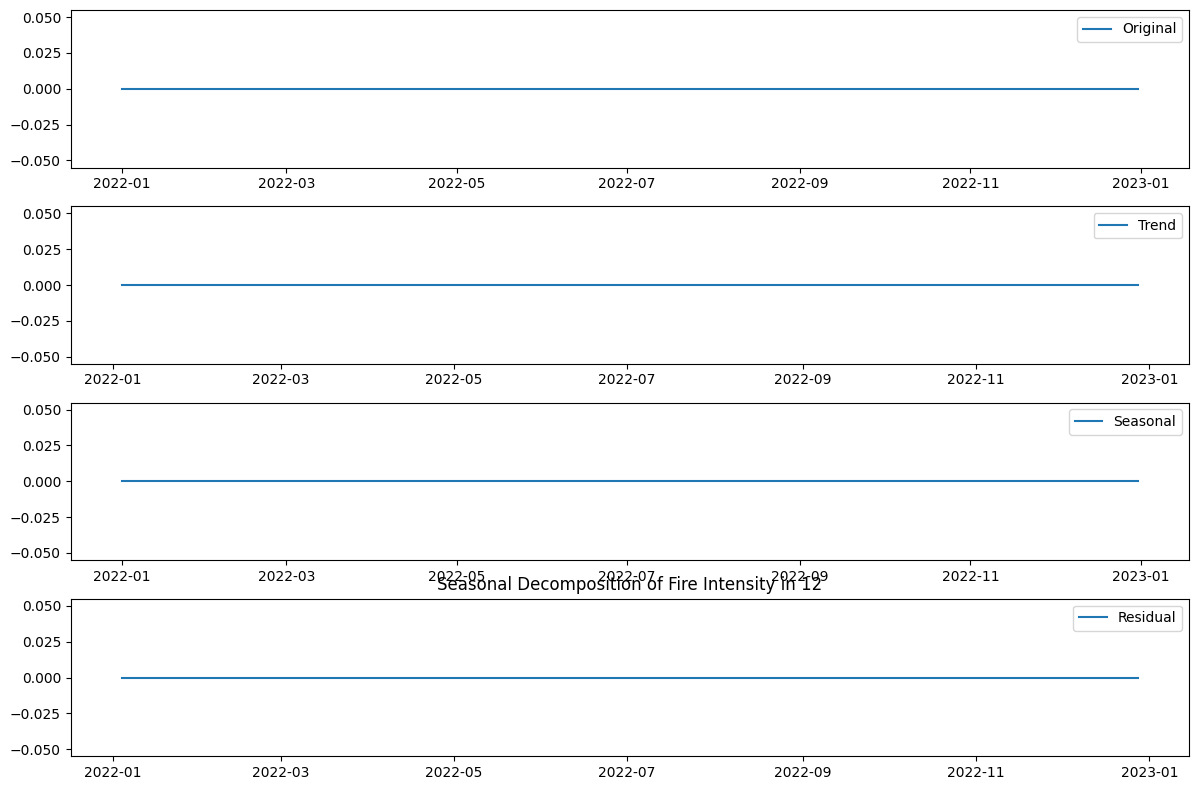

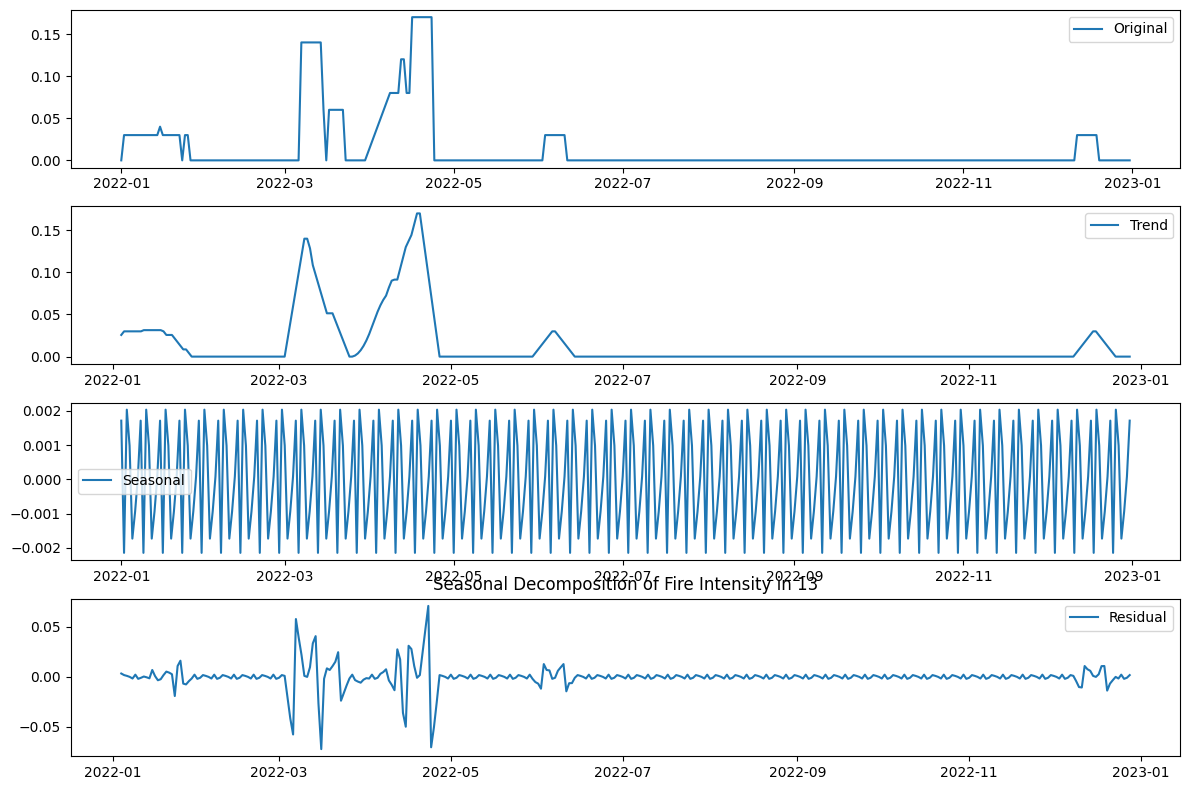

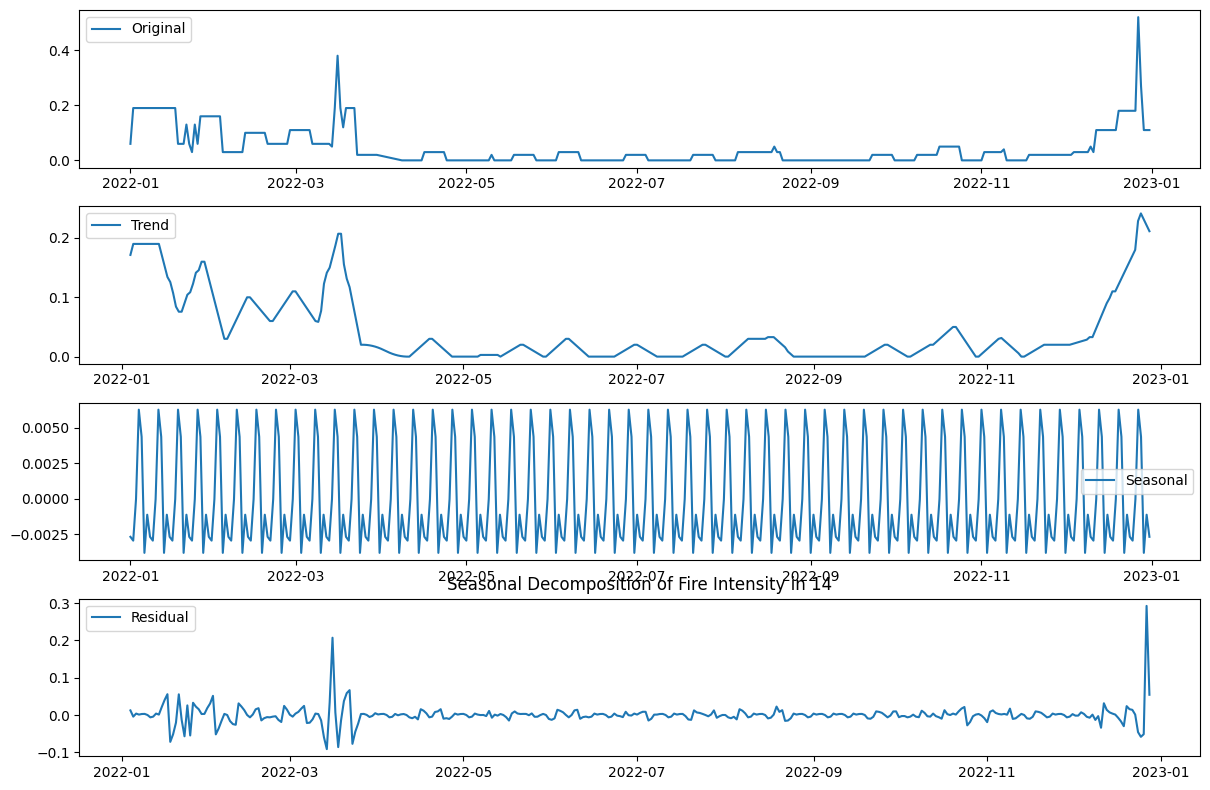

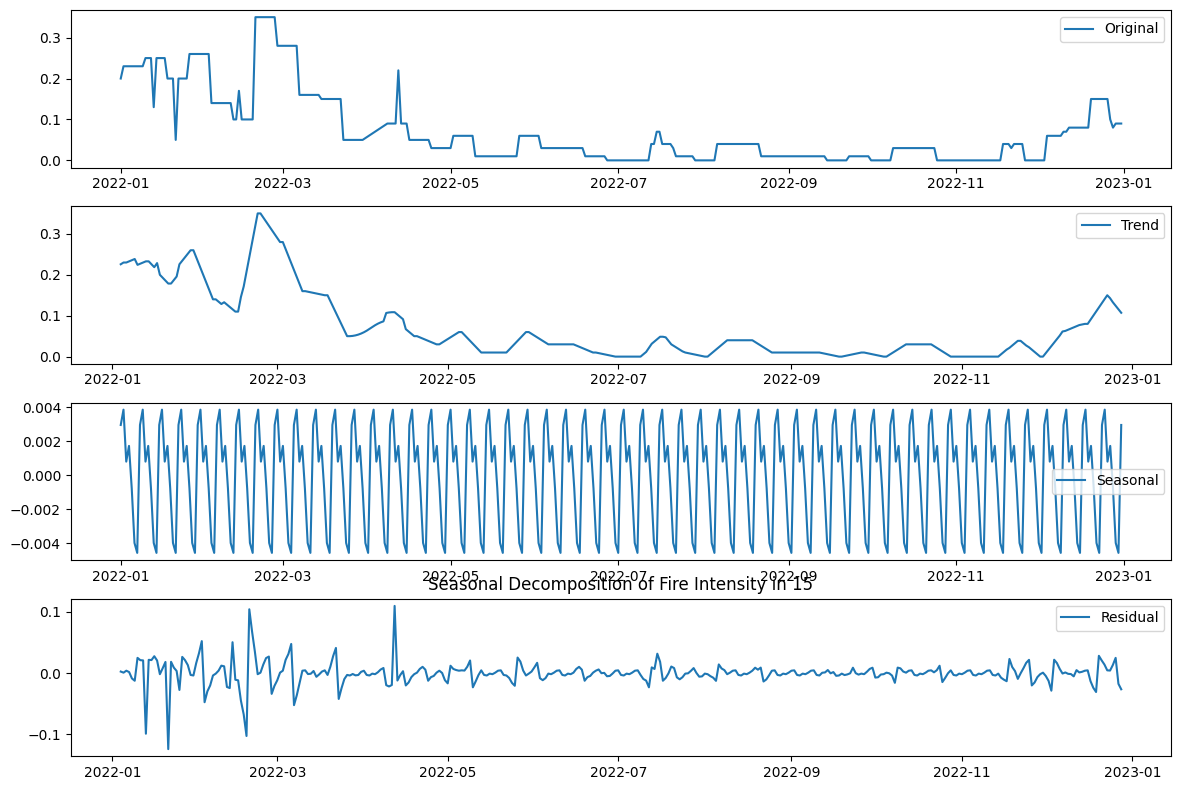

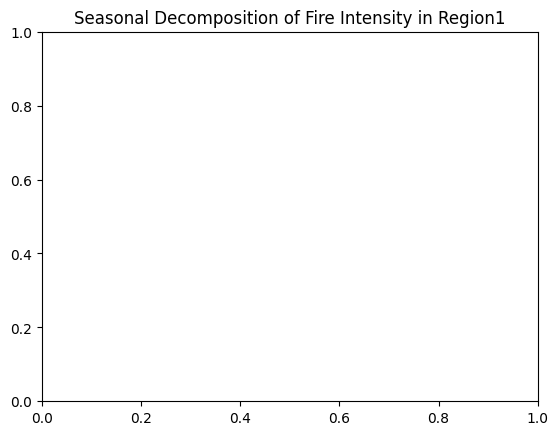

In [30]:

import statsmodels.api as sm
%matplotlib inline


#df.index = pd.to_datetime(df.index)
#df=df.T
with open(output_path, 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.fillna(0, inplace=True)

print(df.head())
date_format = "%Y_%m_%d"
df.columns = pd.to_datetime(df.columns, format=date_format)
date_range = pd.date_range(start=df.columns.min(), end=df.columns.max(), freq='D')

df = df.reindex(columns=date_range)

df.interpolate(method='linear', axis=1, inplace=True)
for region in df.index:
    time_series = pd.Series(df.loc[region].values, index=date_range)
    decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(time_series, label='Original')
    plt.legend()

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend()

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend()

    plt.tight_layout()
    plt.title('Seasonal Decomposition of Fire Intensity in {}'.format(region))
    plt.show()



##check if the distribution of intensity ration is gaussian distribution

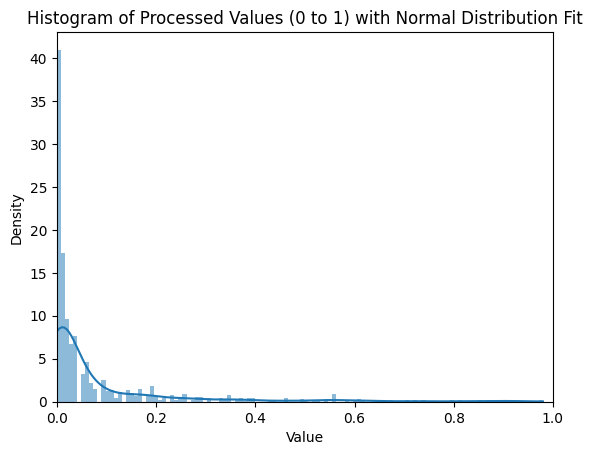

In [50]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

input_path = "/content/gdrive/My Drive/intensities.json"
with open(input_path, 'r') as file:
    data = json.load(file)


all_values = []


for key, val in data.items():
    if len(val) >= 12:
        filtered_values = [v for i, v in enumerate(val) if i != 8 and i != 12]
        all_values.extend(filtered_values)


filtered_all_values = [v for v in all_values if 0 <= v <= 1]


sns.histplot(filtered_all_values, kde=True, stat="density", linewidth=0)


mu, std = norm.fit(filtered_all_values)
xmin, xmax = 0, 1
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)



plt.title("Histogram of Processed Values (0 to 1) with Normal Distribution Fit")
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim(0, 1)


plt.show()


##fire severity

In [77]:
import os
import cv2
import numpy as np

def get_fire_severity(date_str, fire_severity = []):

  for i in range(16):
    file_path = f'/content/gdrive/My Drive/firemasks_2022_dates/' + date_str
    if not os.path.exists(file_path):
      return -1
    file_path = file_path + f'/tile_{i}.tif'
    #print(file_path)
    image = cv2.imread(file_path)

    if image is None:
      print(f"Image {file_path} not found or unable to open.")
      return -1

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])

    red_mask = cv2.inRange(hsv_image, lower_red, upper_red)

    red_pixels = cv2.bitwise_and(hsv_image, hsv_image, mask=red_mask)
    red_pixels_saturation = red_pixels[:, :, 1]  # Extract the Saturation channel
    red_pixels_value = red_pixels[:, :, 2]  # Extract the Value channel (brightness)

    red_area = cv2.countNonZero(red_mask)
    if red_area > 0:
      saturation = np.sum(red_pixels_saturation)
      value = np.sum(red_pixels_value)
      intensity = (saturation + value) / 2
      intensity = intensity / red_area

    else:
      intensity = 0

    fire_severity.append(round(intensity, 2))
  return fire_severity

# Example usage:
fire_severity = get_fire_severity('2022_05_26', [])
print(fire_severity)


[0, 0, 0, 0, 0, 0, 193.92, 0, 0, 0, 0, 201.08, 0, 0, 0, 184.0]


In [78]:
import json
import datetime
start_date = datetime.date(2022, 1, 1)
end_date = datetime.date(2022, 12, 31)
def get_date_strs(start_date, end_date):
  date_strs = []
  for single_date in range((end_date - start_date).days + 1):
    current_date = start_date + datetime.timedelta(days=single_date)
    date_strs.append(current_date.strftime("%Y_%m_%d"))
  return date_strs
date_strs = get_date_strs(datetime.date(2022, 1, 1), datetime.date(2022, 12, 31))


def get_fire_severity_all(date_strs,fire_severity_all = {}):

  for date_str in date_strs:
    fire_severity = get_fire_severity(date_str,[])
    print(fire_severity)
    if fire_severity == -1:
      continue
    fire_severity_all[date_str] = fire_severity
    #print(date_str)
  return fire_severity_all

fire_severity_all = get_fire_severity_all(date_strs)
output_path = "/content/gdrive/My Drive/severities.json"
with open(output_path, "w") as json_file:
    json.dump(fire_severity_all, json_file)

[188.75, 204.25, 210.82, 193.92, 208.08, 223.46, 213.96, 163.5, 0, 186.15, 182.31, 214.41, 0, 0, 202.12, 203.66]
[227.33, 197.08, 198.44, 0, 0, 207.35, 209.65, 200.94, 0, 214.67, 210.31, 205.25, 0, 243.0, 198.88, 199.28]
[227.33, 197.08, 198.44, 0, 0, 207.35, 209.65, 200.94, 0, 214.67, 210.31, 205.25, 0, 243.0, 198.88, 199.28]
[227.33, 197.08, 198.44, 0, 0, 207.35, 209.65, 200.94, 0, 214.67, 210.31, 205.25, 0, 243.0, 197.96, 199.28]
[227.33, 197.08, 198.44, 0, 0, 207.35, 209.65, 200.94, 0, 214.67, 210.31, 205.25, 0, 243.0, 198.88, 199.28]
[227.33, 197.08, 198.44, 0, 0, 207.35, 209.65, 200.81, 0, 214.67, 210.31, 205.25, 0, 243.0, 198.88, 199.28]
[227.33, 197.08, 198.44, 0, 0, 207.35, 209.65, 200.94, 0, 214.67, 210.31, 205.25, 0, 243.0, 198.88, 199.28]
[227.33, 197.08, 198.44, 0, 0, 207.35, 209.65, 200.94, 0, 214.67, 210.31, 205.25, 0, 243.0, 198.88, 199.28]
[227.33, 197.08, 198.44, 0, 0, 207.35, 209.65, 200.94, 0, 214.67, 210.31, 205.25, 0, 243.0, 198.88, 199.28]
[202.96, 212.54, 0, 208

##normalize intensity and severity

14


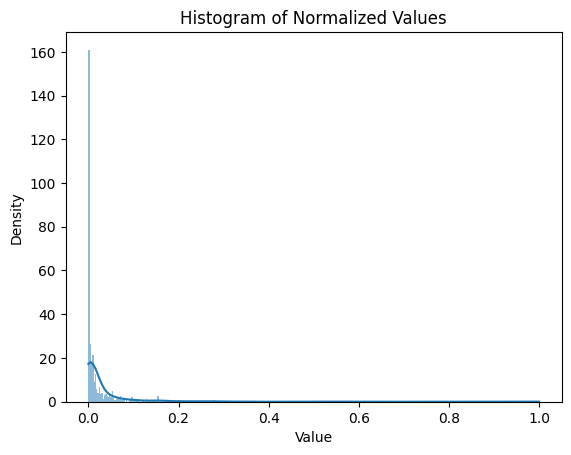

14


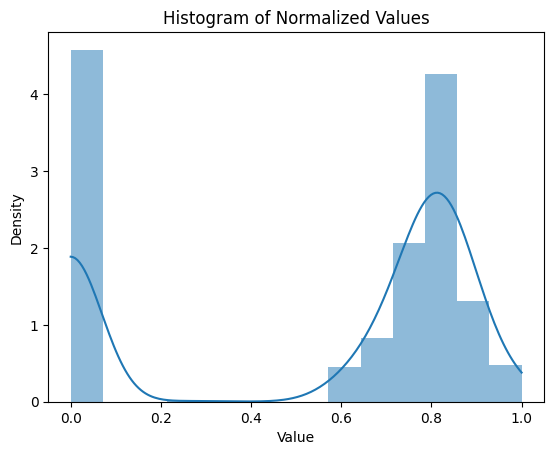

In [83]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def normalize_data(data):
    all_values = []

    # 收集所有剩余的值
    for key, val in data.items():
        filtered_values = [v for i, v in enumerate(val) if i != 8 and i != 12]
        all_values.extend(filtered_values)

    # 归一化
    all_values = np.array(all_values)
    min_val = np.min(all_values)
    max_val = np.max(all_values)

    normalized_data = {}
    for key, val in data.items():
        normalized_values = []
        for i, v in enumerate(val):
            if i != 8 and i != 12:
                normalized_values.append((v - min_val) / (max_val - min_val))

        normalized_data[key] = normalized_values
    print(len(normalized_values))
    return normalized_data


def plot_histogram(data):
    all_normalized_values = []
    for val in data.values():
        all_normalized_values.extend(val)

    sns.histplot(all_normalized_values, kde=True, stat="density", linewidth=0)
    plt.title("Histogram of Normalized Values")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

def process_file(input_path, output_path):
    with open(input_path, 'r') as file:
        data = json.load(file)

    normalized_data = normalize_data(data)
    plot_histogram(normalized_data)

    with open(output_path, 'w') as outfile:
        json.dump(normalized_data, outfile, indent=4)


input_path1 = "/content/gdrive/My Drive/intensities.json"
input_path2 = "/content/gdrive/My Drive/severities.json"
output_path1 = "/content/gdrive/My Drive/intensities_normalized.json"
output_path2 = "/content/gdrive/My Drive/severities_normalized.json"


process_file(input_path1, output_path1)
process_file(input_path2, output_path2)


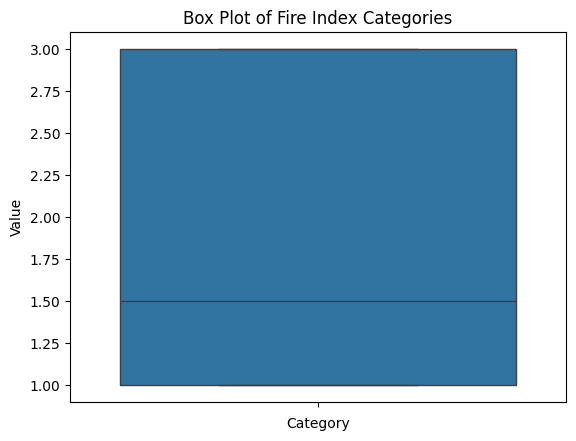

In [84]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_fire_index(intensity_data, severity_data):
    fire_index = {}
    for key in intensity_data.keys():
        intensity = intensity_data[key]
        severity = severity_data[key]

        index_values = [100 * intensity[i] + 1 * severity[i] for i in range(len(intensity))]
        fire_index[key] = index_values
    return fire_index

'''def flatten_and_categorize(data):

    flattened_values = [val for sublist in data.values() for val in sublist]

    cutoffs = np.percentile(flattened_values, [25, 50, 75])
    categories = np.digitize(flattened_values, bins=cutoffs)
    return categories

def plot_box_plot(data):
    sns.boxplot(data=data)
    plt.title("Box Plot of Fire Index Categories")
    plt.xlabel("Category")
    plt.ylabel("Value")
    plt.show()'''

def process_files(intensity_path, severity_path, output_path):
    with open(intensity_path, 'r') as file1, open(severity_path, 'r') as file2:
        intensity_data = json.load(file1)
        severity_data = json.load(file2)

    fire_index = calculate_fire_index(intensity_data, severity_data)
    with open(output_path, 'w') as outfile:
        json.dump(fire_index, outfile, indent=4)

    #categories = flatten_and_categorize(fire_index)
    #plot_box_plot(categories)
intensity_path = "/content/gdrive/My Drive/intensities_normalized.json"
severity_path = "/content/gdrive/My Drive/severities_normalized.json"
output_path = "/content/gdrive/My Drive/fireindex.json"

process_files(intensity_path, severity_path, output_path)


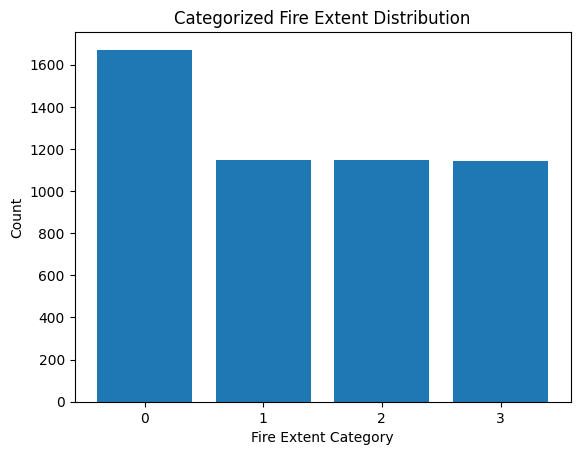

In [223]:
import json

def categorize_fire_intensity(fireindex):

    flattened_values = [value for sublist in fireindex.values() for value in sublist if value != 0]
    flattened_values.sort()


    n = len(flattened_values)
    if n == 0:
        thresholds = (0, 0)
    else:
        thresholds = (flattened_values[n // 3], flattened_values[2 * n // 3])

    def categorize(value):
        if value == 0:
            return 0
        elif value <= thresholds[0]:
            return 1
        elif value <= thresholds[1]:
            return 2
        else:
            return 3

    categorized_fireindex = {
        date: [categorize(value) for value in values]
        for date, values in fireindex.items()
    }

    return categorized_fireindex
def visualize_categorized_data(categorized_data):
    categories = [0, 1, 2, 3]
    category_counts = {category: 0 for category in categories}

    for values in categorized_data.values():
        for category in values:
            category_counts[category] += 1

    plt.bar(categories, [category_counts[category] for category in categories])
    plt.xlabel('Fire Extent Category')
    plt.xticks(categories)
    plt.ylabel('Count')
    plt.title('Categorized Fire Extent Distribution')
    plt.show()

def main(input_path, output_path):

    with open(input_path, 'r') as f:
        fireindex = json.load(f)

    categorized_fireindex = categorize_fire_intensity(fireindex)

    with open(output_path, 'w') as f:
        json.dump(categorized_fireindex, f, indent=4)
    visualize_categorized_data(categorized_fireindex)

input_path = '/content/gdrive/My Drive/fireindex.json'
output_path = '/content/gdrive/My Drive/categorized_fireindex.json'
main(input_path, output_path)


##split the temp/ndwi/ndvi data into dates and tiles

In [25]:
import datetime

start_date = datetime.date(2021, 12, 8)
end_date = datetime.date(2021, 12, 8)
def split_images(image,tile_size):
    tiles = []
    for y in range(0, image.shape[0], tile_size):
        for x in range(0, image.shape[1], tile_size):
            tile = image[y:y + tile_size, x:x + tile_size]

            tiles.append(tile)
    return tiles
for single_date in range((end_date - start_date).days + 1):
    current_date = start_date + datetime.timedelta(days=single_date)
    #print(current_date.strftime("%Y_%m_%d"))
    date_str = current_date.strftime("%Y_%m_%d")
    file_name = date_str + '_temp.tif'
    file_path = '/content/gdrive/My Drive/temp_2022/' + file_name
    if not os.path.exists(file_path):
      print(single_date)
      continue
    print(file_path)
    target_size = (512, 512)
    ndvi_image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
    ndvi_image_resized = cv2.resize(ndvi_image, target_size)




    # Split the images into tiles
    tile_size = 128
    tiles = split_images(ndvi_image_resized,tile_size)
    output_dir = '/content/gdrive/My Drive/temp_2022_dates'
    folder_path = os.path.join(output_dir, date_str)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for i, tile in enumerate(tiles):
        tile_name = f"tile_{i}.tif"
        tile_path = os.path.join(folder_path, tile_name)
        cv2.imwrite(tile_path, tile)

/content/gdrive/My Drive/temp_2022/2021_12_08_temp.tif


##Get the x,y coordinates cover image

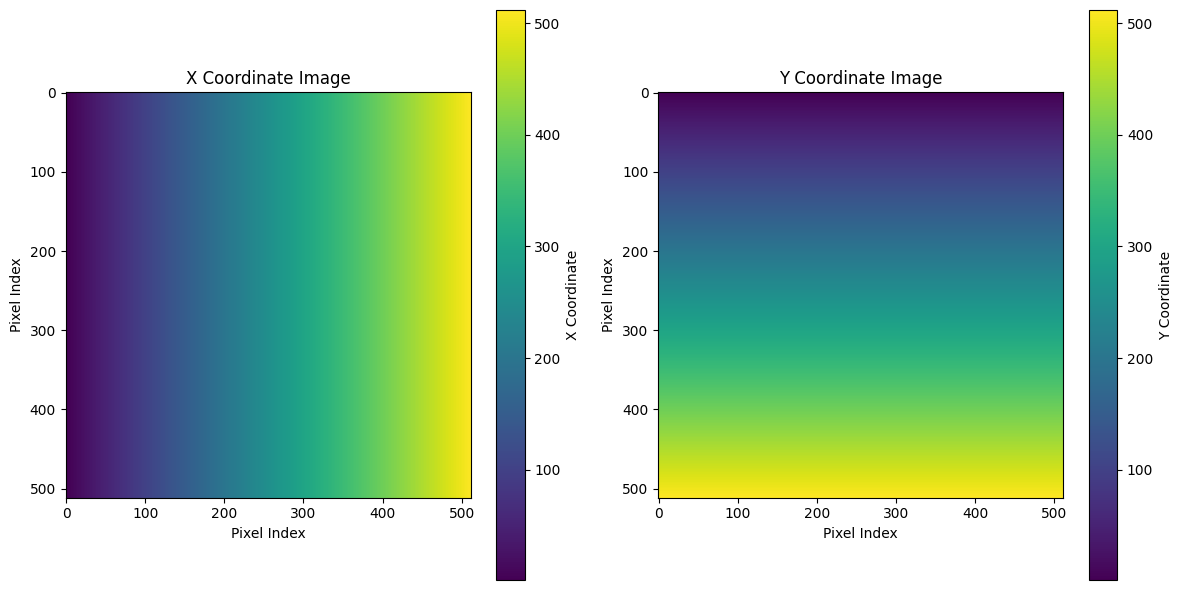

In [63]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

image_size = 512

x_coords = np.linspace(1, image_size, image_size)
y_coords = np.linspace(1, image_size, image_size)


x_image = np.tile(x_coords, (image_size, 1))
y_image = np.tile(y_coords.reshape(-1, 1), (1, image_size))


norm = mcolors.Normalize(vmin=1, vmax=image_size)
cmap = plt.cm.viridis


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.title('X Coordinate Image')
plt.imshow(x_image, cmap=cmap, norm=norm)
plt.colorbar(label='X Coordinate')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Index')


plt.subplot(1, 2, 2)
plt.title('Y Coordinate Image')
plt.imshow(y_image, cmap=cmap, norm=norm)
plt.colorbar(label='Y Coordinate')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Index')

plt.tight_layout()


x_image_pil = Image.fromarray((cmap(norm(x_image)) * 255).astype(np.uint8))
y_image_pil = Image.fromarray((cmap(norm(y_image)) * 255).astype(np.uint8))
output_path_x = '/content/gdrive/My Drive/training_images/' + 'xCoordinates_color.tif'
output_path_y = '/content/gdrive/My Drive/training_images/' + 'yCoordinates_color.tif'
x_image_pil.save(output_path_x)
y_image_pil.save(output_path_y)

plt.show()


##split the images

In [64]:


def split_images(image,tile_size):
    tiles = []
    for y in range(0, image.shape[0], tile_size):
        for x in range(0, image.shape[1], tile_size):
            tile = image[y:y + tile_size, x:x + tile_size]

            tiles.append(tile)
    return tiles
tile_size = 128
file_name1 = 'xCoordinates.tif'
file_path1 = '/content/gdrive/My Drive/training_images/' + file_name1

file_name2 = 'xCoordinates.tif'
file_path2 = '/content/gdrive/My Drive/training_images/' + file_name2
image1 = cv2.imread(file_path1, cv2.IMREAD_UNCHANGED)
image2 = cv2.imread(file_path2, cv2.IMREAD_UNCHANGED)
tiles1 = split_images(image1,tile_size)
tiles2 = split_images(image2,tile_size)
output_dir1 = '/content/gdrive/My Drive/training_images/xCoordinates'
output_dir2 = '/content/gdrive/My Drive/training_images/yCoordinates'


for i, tile in enumerate(tiles1):
    tile_name = f"tile_{i}.tif"
    tile_path = os.path.join(output_dir1, tile_name)
    cv2.imwrite(tile_path, tile)

for i, tile in enumerate(tiles2):
    tile_name = f"tile_{i}.tif"
    tile_path = os.path.join(output_dir2, tile_name)
    cv2.imwrite(tile_path, tile)

In [66]:


def split_images(image,tile_size):
    tiles = []
    for y in range(0, image.shape[0], tile_size):
        for x in range(0, image.shape[1], tile_size):
            tile = image[y:y + tile_size, x:x + tile_size]

            tiles.append(tile)
    return tiles
tile_size = 128
file_name = '2021_fire_mask.tif'
file_path = '/content/gdrive/My Drive/training_images/' + file_name

image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
target_size = (512, 512)
image = cv2.resize(image, target_size)

tiles = split_images(image,tile_size)
output_dir = '/content/gdrive/My Drive/training_images/firemask_2021_entire'



for i, tile in enumerate(tiles):
    tile_name = f"tile_{i}.tif"
    tile_path = os.path.join(output_dir, tile_name)
    cv2.imwrite(tile_path, tile)



/content/gdrive/My Drive/ndvi_2022/2022_02_04_ndvi.tif


In [210]:

import datetime

start_date = datetime.date(2022, 7, 22)
end_date = datetime.date(2022, 7, 22)
def split_images(image,tile_size):
    tiles = []
    for y in range(0, image.shape[0], tile_size):
        for x in range(0, image.shape[1], tile_size):
            tile = image[y:y + tile_size, x:x + tile_size]

            tiles.append(tile)
    return tiles
for single_date in range((end_date - start_date).days + 1):
    current_date = start_date + datetime.timedelta(days=single_date)
    #print(current_date.strftime("%Y_%m_%d"))
    date_str = current_date.strftime("%Y_%m_%d")
    file_name = date_str + '_ndwi.tif'
    file_path = '/content/gdrive/My Drive/ndwi_2022/' + file_name
    if not os.path.exists(file_path):
      continue
    print(file_path)
    target_size = (512, 512)
    firemask_image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
    firemask_image_resized = cv2.resize(firemask_image, target_size)




    # Split the images into tiles
    tile_size = 128
    tiles = split_images(firemask_image_resized,tile_size)
    output_dir = '/content/gdrive/My Drive/ndwi_2022_dates'
    folder_path = os.path.join(output_dir, date_str)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for i, tile in enumerate(tiles):
        tile_name = f"tile_{i}.tif"
        tile_path = os.path.join(folder_path, tile_name)
        cv2.imwrite(tile_path, tile)


/content/gdrive/My Drive/ndwi_2022/2022_07_22_ndwi.tif


In [220]:

import datetime

start_date = datetime.date(2022, 7, 23)
end_date = datetime.date(2022, 7, 23)
def split_images(image,tile_size):
    tiles = []
    for y in range(0, image.shape[0], tile_size):
        for x in range(0, image.shape[1], tile_size):
            tile = image[y:y + tile_size, x:x + tile_size]

            tiles.append(tile)
    return tiles
for single_date in range((end_date - start_date).days + 1):
    current_date = start_date + datetime.timedelta(days=single_date)
    #print(current_date.strftime("%Y_%m_%d"))
    date_str = current_date.strftime("%Y_%m_%d")
    file_name = date_str + '_temp.tif'
    file_path = '/content/gdrive/My Drive/temp_2022/' + file_name
    if not os.path.exists(file_path):
      continue
    print(file_path)
    target_size = (512, 512)
    firemask_image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
    firemask_image_resized = cv2.resize(firemask_image, target_size)




    # Split the images into tiles
    tile_size = 128
    tiles = split_images(firemask_image_resized,tile_size)
    output_dir = '/content/gdrive/My Drive/temp_2022_dates'
    folder_path = os.path.join(output_dir, date_str)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for i, tile in enumerate(tiles):
        tile_name = f"tile_{i}.tif"
        tile_path = os.path.join(folder_path, tile_name)
        cv2.imwrite(tile_path, tile)


/content/gdrive/My Drive/temp_2022/2022_07_23_temp.tif


In [200]:

import datetime

start_date = datetime.date(2022, 7, 18)
end_date = datetime.date(2022, 7, 18)
def split_images(image,tile_size):
    tiles = []
    for y in range(0, image.shape[0], tile_size):
        for x in range(0, image.shape[1], tile_size):
            tile = image[y:y + tile_size, x:x + tile_size]

            tiles.append(tile)
    return tiles
for single_date in range((end_date - start_date).days + 1):
    current_date = start_date + datetime.timedelta(days=single_date)
    #print(current_date.strftime("%Y_%m_%d"))
    date_str = current_date.strftime("%Y_%m_%d")
    file_name = date_str + '_ndvi.tif'
    file_path = '/content/gdrive/My Drive/ndvi_2022/' + file_name
    if not os.path.exists(file_path):
      continue
    print(file_path)
    target_size = (512, 512)
    firemask_image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
    firemask_image_resized = cv2.resize(firemask_image, target_size)




    # Split the images into tiles
    tile_size = 128
    tiles = split_images(firemask_image_resized,tile_size)
    output_dir = '/content/gdrive/My Drive/ndvi_2022_dates'
    folder_path = os.path.join(output_dir, date_str)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for i, tile in enumerate(tiles):
        tile_name = f"tile_{i}.tif"
        tile_path = os.path.join(folder_path, tile_name)
        cv2.imwrite(tile_path, tile)


/content/gdrive/My Drive/ndvi_2022/2022_07_18_ndvi.tif


##Concatenate the tensors into input stacked tensor

In [232]:
import os
import torch
import datetime
from torchvision import transforms
from PIL import Image

def load_image_as_tensor(image_path):
    image = Image.open(image_path)
    transform = transforms.ToTensor()
    try:
      tensor = transform(image)
    except Exception as e:
      print(f"Error loading image: {image_path}")
      print("Error loading image:", e)
    return tensor
start_date = datetime.date(2022, 8, 1)
end_date = datetime.date(2022, 8, 1)
def construct_tensors(start_date,end_date):

    elevation_path = '/content/gdrive/My Drive/training_images/DEM'
    landcover_path = '/content/gdrive/My Drive/training_images/landcover'
    x_path = '/content/gdrive/My Drive/training_images/xCoordinates'
    y_path = '/content/gdrive/My Drive/training_images/yCoordinates'
    fm2021_path = '/content/gdrive/My Drive/training_images/firemask_2021_entire'
    deltas = [8,16,24]
    for single_date in range((end_date - start_date).days + 1):
        current_date = start_date + datetime.timedelta(days=single_date)
        output_dir = '/content/gdrive/My Drive/train_tensor/'+current_date.strftime("%Y_%m_%d")

        os.makedirs(output_dir, exist_ok=True)
        print(output_dir)

        for i in range(16):
            if i == 8 or i == 12:
                continue
            elevation_tensor = load_image_as_tensor(os.path.join(elevation_path, f'elevation_tile_{i}.tif'))
            lc_tensor = load_image_as_tensor(os.path.join(landcover_path, f'landcover_tile_{i}.tif'))
            x_tensor = load_image_as_tensor(os.path.join(x_path, f'tile_{i}.tif'))
            y_tensor = load_image_as_tensor(os.path.join(y_path, f'tile_{i}.tif'))
            fm2021_tensor = load_image_as_tensor(os.path.join(fm2021_path, f'tile_{i}.tif'))
            ndvi_tensors,ndwi_tensors,temp_tensors = [],[],[]
            for delta in deltas:
              date_used = current_date - datetime.timedelta(days=delta)
              datestr = date_used.strftime("%Y_%m_%d")
              ndvi_path = '/content/gdrive/My Drive/ndvi_2022_dates/'+datestr
              ndwi_path = '/content/gdrive/My Drive/ndwi_2022_dates/'+datestr
              #trmm_path = '/content/gdrive/My Drive/trmm_2022_dates/'+datestr+'_trmm'
              temp_path = '/content/gdrive/My Drive/temp_2022_dates/'+datestr
              ndvi_tensor = load_image_as_tensor(os.path.join(ndvi_path, f'tile_{i}.tif'))
              ndwi_tensor = load_image_as_tensor(os.path.join(ndwi_path, f'tile_{i}.tif'))
              temp_tensor = load_image_as_tensor(os.path.join(temp_path, f'tile_{i}.tif'))
              ndvi_tensors.append(ndvi_tensor)
              ndwi_tensors.append(ndwi_tensor)
              temp_tensors.append(temp_tensor)
            #trmm_tensor = load_image_as_tensor(os.path.join(trmm_path, f'tile_{i}.tif'))
            stacked_tensor = torch.cat((elevation_tensor, lc_tensor, x_tensor, y_tensor, fm2021_tensor), dim=0)
            for ndvi_tensor, ndwi_tensor, temp_tensor in zip(ndvi_tensors, ndwi_tensors, temp_tensors):
                stacked_tensor = torch.cat((stacked_tensor, ndvi_tensor, ndwi_tensor, temp_tensor), dim=0)

            print("tensor shape:", stacked_tensor.shape)

            output_path = os.path.join(output_dir, f'stacked_tensor_{i}.pt')
            torch.save(stacked_tensor, output_path)
        print(current_date.strftime("%Y_%m_%d"))
construct_tensors(start_date,end_date)

/content/gdrive/My Drive/train_tensor/2022_08_01
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
tensor shape: torch.Size([44, 128, 128])
2022_08_01


In [224]:
import json
from datetime import datetime

start_date = datetime.strptime("2022_01_01", "%Y_%m_%d")
end_date = datetime.strptime("2022_07_31", "%Y_%m_%d")

with open('/content/gdrive/My Drive/categorized_fireindex.json', 'r') as f:
    data = json.load(f)


new_data = {}


for key, value in data.items():
    date = datetime.strptime(key, "%Y_%m_%d")
    if start_date <= date <= end_date:
        new_data[key] = value

with open('/content/gdrive/My Drive/categorized_fireindex_filtered.json', 'w') as f:
    json.dump(new_data, f, indent=4)


##CNN Regression

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
import os
import json

class FireRiskDataset(Dataset):
    def __init__(self, tensor_dir, labels_path, transform=None):
        self.tensor_dir = tensor_dir
        self.transform = transform
        with open(labels_path, 'r') as f:
            self.labels = json.load(f)
        self.dates = list(self.labels.keys())

    def __len__(self):
        return len(self.dates) * 14  # 14 regions per date

    def __getitem__(self, idx):
        date_idx = idx // 14
        region_idx = idx % 14
        label_idx = region_idx
        if 8 <= region_idx <= 10:
          region_idx += 1
        elif region_idx >= 11:
          region_idx += 2
        date = self.dates[date_idx]
        tensor_path = os.path.join(self.tensor_dir, date, f'stacked_tensor_{region_idx}.pt')
        tensor = torch.load(tensor_path)
        label = self.labels[date][label_idx]

        if self.transform:
            tensor = self.transform(tensor)

        #return tensor, label, tensor_path, date, region_idx
        return tensor, label
tensor_dir = '/content/gdrive/My Drive/train_tensor'
labels_path = '/content/gdrive/My Drive/categorized_fireindex_filtered.json'


dataset = FireRiskDataset(tensor_dir, labels_path)
'''for idx in range(len(dataset)):
    tensor, label, tensor_path, date, region_idx = dataset[idx]
    print(f"Date: {date}, Region: {region_idx}, Tensor Path: {tensor_path}, Label: {label}")


    if idx >= 20:
        break'''
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class FireRiskCNN(nn.Module):
    def __init__(self):
        super(FireRiskCNN, self).__init__()


        self.conv1 = nn.Conv2d(in_channels=44, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)


        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(256 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 4)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(x.size(0), -1)


        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x
model = FireRiskCNN().to(device)


In [21]:
import torch
from torch.utils.data import random_split
dataset_size = len(data_loader.dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size


train_dataset, val_dataset = random_split(data_loader.dataset, [train_size, val_size])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False)


In [25]:
import torch.optim as optim
import torch.nn as nn


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

learning_rate = 0.001
num_epochs = 10


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model.to(device)


for epoch in range(num_epochs):

    model.train()
    train_loss = 0.0
    for tensors, labels in train_loader:

        tensors, labels = tensors.to(device), labels.to(device)

        outputs = model(tensors)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        train_loss += loss.item() * tensors.size(0)


    train_loss = train_loss / len(train_loader.dataset)


    model.eval()
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0
    with torch.no_grad():
        for tensors, labels in val_loader:

            tensors, labels = tensors.to(device), labels.to(device)


            outputs = model(tensors)
            loss = criterion(outputs, labels)


            val_loss += loss.item() * tensors.size(0)


            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)


    val_loss = val_loss / len(val_loader.dataset)


    val_accuracy = correct_preds / total_preds

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {train_loss:.4f}, '
          f'Validation Loss: {val_loss:.4f}, '
          f'Validation Accuracy: {val_accuracy:.4f}')

print('Finished Training')


Epoch [1/10], Training Loss: 1.0931, Validation Loss: 0.8697, Validation Accuracy: 0.6077
Epoch [2/10], Training Loss: 0.8130, Validation Loss: 0.8130, Validation Accuracy: 0.6566
Epoch [3/10], Training Loss: 0.5485, Validation Loss: 0.4257, Validation Accuracy: 0.8468
Epoch [4/10], Training Loss: 0.3371, Validation Loss: 0.2704, Validation Accuracy: 0.9360
Epoch [5/10], Training Loss: 0.1878, Validation Loss: 0.2472, Validation Accuracy: 0.9360
Epoch [6/10], Training Loss: 0.1673, Validation Loss: 0.1625, Validation Accuracy: 0.9444
Epoch [7/10], Training Loss: 0.1078, Validation Loss: 0.1507, Validation Accuracy: 0.9747
Epoch [8/10], Training Loss: 0.0976, Validation Loss: 0.1251, Validation Accuracy: 0.9747
Epoch [9/10], Training Loss: 0.0804, Validation Loss: 0.1367, Validation Accuracy: 0.9663
Epoch [10/10], Training Loss: 0.0657, Validation Loss: 0.1312, Validation Accuracy: 0.9747
Finished Training
